# Loading Dataset and Visualizing the Correlation

                 D3A          D3AAO          D3AMM          D3APO  \
count  220740.000000  220740.000000  220740.000000  220740.000000   
mean       15.768748       0.985778       2.966849      11.816121   
std        10.740831       2.405852       4.572993       8.893433   
min         0.000000       0.000000       0.000000       0.000000   
25%         5.614527       0.000000       0.641711       3.403056   
50%        15.620292       0.020776       1.611053      11.423519   
75%        23.381775       0.816396       3.225885      18.448647   
max       166.894521     107.987669      56.531576     143.916452   

                 D3B          D3BAO         D3BMM3         D3BMM4  \
count  220740.000000  220740.000000  220740.000000  220740.000000   
mean       78.256064       2.254560      13.752833       8.041011   
std        83.199666       8.292774      24.373752      18.025575   
min         0.000000       0.000000       0.000000       0.000000   
25%        13.277150       0.0000

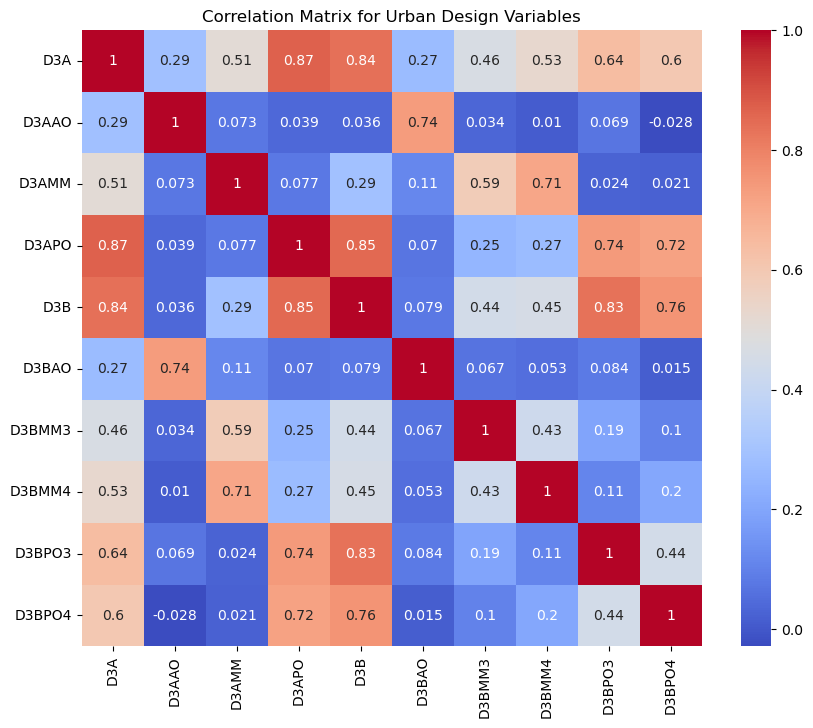

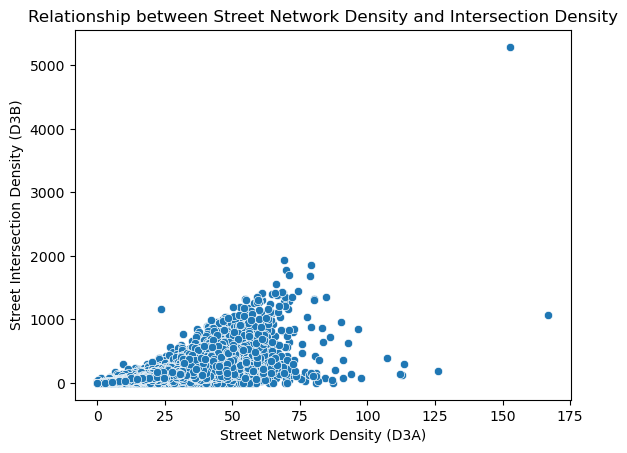

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'C:/Users/EndUser/Downloads/EPA_SmartLocationDatabase.csv' # Edit to change file location
data = pd.read_csv(file_path)

# Descriptive Statistics
print(data.describe())

# Correlation Analysis
correlation_matrix = data.corr()
print(correlation_matrix)

# Heatmap for Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Urban Design Variables')
plt.show()

# Scatter plot for a pair of variables
sns.scatterplot(data=data, x='D3A', y='D3B')
plt.title('Relationship between Street Network Density and Intersection Density')
plt.xlabel('Street Network Density (D3A)')
plt.ylabel('Street Intersection Density (D3B)')
plt.show()

# Preprocessing: Handling NA,0 values

In [2]:
# Preprocessing: Remove rows with any zeros
data_cleaned = data[(data != 0).all(axis=1)]

# Displaying the structure and summary of the cleaned dataset
data_cleaned.info()
data_cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59075 entries, 1 to 220684
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   D3A     59075 non-null  float64
 1   D3AAO   59075 non-null  float64
 2   D3AMM   59075 non-null  float64
 3   D3APO   59075 non-null  float64
 4   D3B     59075 non-null  float64
 5   D3BAO   59075 non-null  float64
 6   D3BMM3  59075 non-null  float64
 7   D3BMM4  59075 non-null  float64
 8   D3BPO3  59075 non-null  float64
 9   D3BPO4  59075 non-null  float64
dtypes: float64(10)
memory usage: 5.0 MB


,D3A,D3AAO,D3AMM,D3APO,D3B,D3BAO,D3BMM3,D3BMM4,D3BPO3,D3BPO4
count,59075.000000,59075.000000,59075.000000,59075.000000,59075.000000,59075.000000,59075.000000,59075.000000,59075.000000,59075.000000
mean,10.891456,1.862910,2.115504,6.913042,43.332905,4.535964,8.892745,4.082351,35.983730,9.317945
std,9.986869,2.726193,2.292270,6.799332,60.317206,8.664562,13.611848,8.630311,53.570907,18.314774
min,0.026962,0.000002,0.000110,0.006519,0.007706,0.000415,0.001490,0.000108,0.002350,0.000332
25%,2.885703,0.334565,0.840907,1.401083,3.833159,0.633630,1.508414,0.272037,2.375769,0.358627
50%,7.002467,0.820929,1.507731,4.425729,19.157229,1.631947,4.218577,1.024149,15.031612,2.504463
75%,16.763014,2.294451,2.524491,11.130022,62.068365,4.839395,10.662933,4.048129,50.379698,10.176242
max,107.340936,51.233506,43.931123,71.885696,1388.218273,258.005112,500.556178,255.592799,1592.953905,627.359276


# Preprocessing: Handling Outliers

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# Handling outliers (example: capping)
for column in data_cleaned.columns:
    q1 = data_cleaned[column].quantile(0.25)
    q3 = data_cleaned[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data_cleaned[column] = np.where(data_cleaned[column] > upper_bound, upper_bound, data_cleaned[column])
    data_cleaned[column] = np.where(data_cleaned[column] < lower_bound, lower_bound, data_cleaned[column])

# Feature Scaling (example: standardization)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)
data_scaled = pd.DataFrame(data_scaled, columns=data_cleaned.columns)

# Check the transformed data
data_scaled.describe()


C:\Users\EndUser\AppData\Local\Temp\ipykernel_24340\3617094024.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = np.where(data_cleaned[column] > upper_bound, upper_bound, data_cleaned[column])
C:\Users\EndUser\AppData\Local\Temp\ipykernel_24340\3617094024.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = np.where(data_cleaned[column] < lower_bound, lower_bound, data_cleaned[column])


,D3A,D3AAO,D3AMM,D3APO,D3B,D3BAO,D3BMM3,D3BMM4,D3BPO3,D3BPO4
count,5.907500e+04,5.907500e+04,5.907500e+04,5.907500e+04,5.907500e+04,5.907500e+04,5.907500e+04,5.907500e+04,5.907500e+04,5.907500e+04
mean,1.185307e-15,3.674475e-15,1.947490e-16,-1.875276e-16,-2.801311e-15,3.746130e-15,-2.211767e-15,-1.106762e-14,-3.631812e-15,6.093859e-15
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-1.123186e+00,-9.538587e-01,-1.317986e+00,-1.035899e+00,-8.726244e-01,-9.168139e-01,-9.670939e-01,-8.206963e-01,-8.521415e-01,-7.954184e-01
25%,-8.243704e-01,-7.489665e-01,-7.270832e-01,-8.251981e-01,-7.879589e-01,-7.413940e-01,-7.671654e-01,-7.376843e-01,-7.887672e-01,-7.524760e-01
50%,-3.940571e-01,-4.511087e-01,-2.584462e-01,-3.682122e-01,-4.488039e-01,-4.648300e-01,-4.075994e-01,-5.080861e-01,-4.508347e-01,-4.952930e-01
75%,6.261843e-01,4.513014e-01,4.561222e-01,6.447217e-01,5.009127e-01,4.237307e-01,4.473940e-01,4.150475e-01,4.930193e-01,4.241859e-01
max,2.802016e+00,2.251703e+00,2.230930e+00,2.849601e+00,2.434220e+00,2.171418e+00,2.269233e+00,2.144145e+00,2.415699e+00,2.189179e+00


In [5]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(features, sample_data[target])
selected_features = features.columns[selector.get_support()]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, sample_data[target], test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    
}

# Train and evaluate each model
performance = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    performance[model_name] = {'MSE': mse, 'R^2': r2}

# Print out the performance metrics for each model
for model in performance:
    print(f"{model} - MSE: {performance[model]['MSE']}, R^2: {performance[model]['R^2']}")

Linear Regression - MSE: 0.03144480644610493, R^2: 0.968722742750509
Ridge Regression - MSE: 0.03144520737619103, R^2: 0.9687223439567221


# Linear Regression in Spark

In [11]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import col

# Initialize the Spark session
spark = SparkSession.builder.appName("LocationEfficiencyAnalysis").getOrCreate()

# Load the dataset
data_path = 'C:/Users/EndUser/Downloads/EPA_SmartLocationDatabase_V3_Jan_2021_Final (1).csv'
sdf = spark.read.csv(data_path, header=True, inferSchema=True)

# Preprocessing: Drop missing values and duplicates
sdf_cleaned = sdf.na.drop().dropDuplicates()

# Define the feature columns based on the provided selected features
feature_columns = ['D3A', 'D3APO', 'D3BMM4', 'D3BPO3', 'D3BPO4']

# Assemble features into a single vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
sdf_prepared = assembler.transform(sdf_cleaned)

# Select the features vector and the target variable 'D3B'
sdf_prepared = sdf_prepared.select(col("features"), col("D3B").alias("label"))

# Split the data into training, test, and validation sets
train_data, test_data, validation_data = sdf_prepared.randomSplit([0.2, 0.6, 0.2], seed=42)

# Define the regression model
lr = LinearRegression(featuresCol="features", labelCol="label")

# Train the model on the training data
lr_model = lr.fit(train_data)

# Make predictions on the test data
test_predictions = lr_model.transform(test_data)

# Make predictions on the validation data
validation_predictions = lr_model.transform(validation_data)

# Evaluate the model using RMSE and R-squared
evaluator_rmse = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")

# Calculate RMSE and R-squared for test data
test_rmse = evaluator_rmse.evaluate(test_predictions)
test_r2 = evaluator_r2.evaluate(test_predictions)

# Calculate RMSE and R-squared for validation data
validation_rmse = evaluator_rmse.evaluate(validation_predictions)
validation_r2 = evaluator_r2.evaluate(validation_predictions)

# Print the RMSE and R-squared values for both test and validation data
print(f"Test Data: Root Mean Squared Error (RMSE): {test_rmse}, R-squared (R2): {test_r2}")
print(f"Validation Data: Root Mean Squared Error (RMSE): {validation_rmse}, R-squared (R2): {validation_r2}")


Test Data: Root Mean Squared Error (RMSE): 15.025993694425376, R-squared (R2): 0.9695024127963978
Validation Data: Root Mean Squared Error (RMSE): 14.632192056630423, R-squared (R2): 0.9705824915441581


# Manual testing

In [22]:

# Example: Coefficients and intercept from your trained model
# You should replace these with the actual values from your lr_model
coefficients = lr_model.coefficients  # Replace with actual coefficients
intercept = lr_model.intercept  # Replace with the actual intercept

# New feature values for prediction
new_feature_values = [14.7411209, 6.163822098, 5.346155779, 44.10578517, 8.910259631]  # Replace with actual values

# Prediction calculation
prediction = sum([coef * value for coef, value in zip(coefficients, new_feature_values)]) + intercept

print("Predicted value of D3:", prediction)
 

Predicted value of D3: 56.64905145672163


# Scalability Assessment

In [3]:
def run_spark_job(data_size):
    # Load a subset of the data based on data_size
    spark = SparkSession.builder.appName("LocationEfficiencyAnalysis").getOrCreate()

# Load the dataset
    data_path = 'C:/Users/EndUser/Downloads/EPA_SmartLocationDatabase.csv'
    sdf = spark.read.csv(data_path, header=True, inferSchema=True)
    sdf_sampled = sdf.sample(withReplacement=False, fraction=data_size)

    # Preprocessing
    sdf_cleaned = sdf_sampled.na.drop().dropDuplicates()
    assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
    sdf_prepared = assembler.transform(sdf_cleaned)
    sdf_prepared = sdf_prepared.select(col("features"), col("D3B").alias("label"))

    # Split the data into training, test, and validation sets
    train_data, test_data, validation_data = sdf_prepared.randomSplit([0.2, 0.6, 0.2], seed=42)

    # Define and train the regression model
    lr = LinearRegression(featuresCol="features", labelCol="label")
    lr_model = lr.fit(train_data)

    # Make predictions
    test_predictions = lr_model.transform(test_data)
    validation_predictions = lr_model.transform(validation_data)

    # Evaluate the model
    evaluator_rmse = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
    evaluator_r2 = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")
    
    test_rmse = evaluator_rmse.evaluate(test_predictions)
    test_r2 = evaluator_r2.evaluate(test_predictions)
    validation_rmse = evaluator_rmse.evaluate(validation_predictions)
    validation_r2 = evaluator_r2.evaluate(validation_predictions)

    # Return the evaluation results
    return (test_rmse, test_r2, validation_rmse, validation_r2)


Results : (test_rmse, test_r2, validation_rmse, validation_r2)
Results for data size 0.1: (13.541345917482477, 0.9741609711627325, 13.415910302045422, 0.9730711219762249)
Execution time: 16.844135522842407 seconds
Results for data size 0.2: (12.973550503288982, 0.9754759962070801, 13.91811233643722, 0.9701266672838655)
Execution time: 16.236275911331177 seconds
Results for data size 0.5: (13.40720766638279, 0.9745409215523505, 13.569024965340587, 0.973279409076914)
Execution time: 17.923729419708252 seconds
Results for data size 1.0: (13.341471498267454, 0.9740680723480336, 13.345195085943873, 0.9740361779461307)
Execution time: 23.279486656188965 seconds


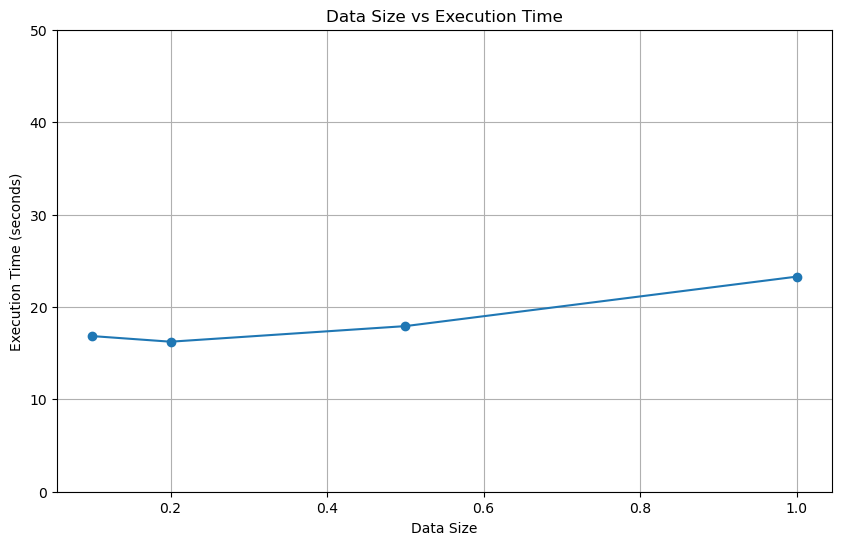

In [27]:
import time
import matplotlib.pyplot as plt

data_sizes = [0.1, 0.2, 0.5, 1.0]  # Example sizes: 10%, 20%, 50%, 100% of the data
execution_times = []

print("Results : (test_rmse, test_r2, validation_rmse, validation_r2)")
for size in data_sizes:
    start_time = time.time()
    results = run_spark_job(size)
    end_time = time.time()

    execution_time = end_time - start_time
    execution_times.append(execution_time)

    print(f"Results for data size {size}: {results}")
    print(f"Execution time: {execution_time} seconds")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data_sizes, execution_times, marker='o')
plt.title("Data Size vs Execution Time")
plt.xlabel("Data Size")
plt.ylabel("Execution Time (seconds)")
plt.ylim(0, 50)  # Set the y-axis range from 0 to 50 seconds
plt.grid(True)
plt.show()


# Spatial Analysis
## Loading dataset and Visualization 

In [13]:
import geopandas as gpd

In [14]:
gdf = gpd.read_file('C:/Users/EndUser/Downloads/SmartLocationDatabaseV3/SmartLocationDatabase.gdb', layer='EPA_SLD_Database_V3', rows=15750)

In [15]:
gdf.head()

,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,CBSA_Name,...,VMT_per_worker,VMT_tot_min,VMT_tot_max,VMT_tot_avg,GHG_per_worker,Annual_GHG,SLC_score,Shape_Length,Shape_Area,geometry
0,481130078254,481130078254,48,113,007825,4,206,"Dallas-Fort Worth, TX-OK",19100,"Dallas-Fort Worth-Arlington, TX",...,27.496405,11.442995,82.636303,25.659327,24.499297,6369.817221,77.450956,3110.360820,297836.083090,"MULTIPOLYGON (((-68983.316 1091325.734, -68981..."
1,481130078252,481130078252,48,113,007825,2,206,"Dallas-Fort Worth, TX-OK",19100,"Dallas-Fort Worth-Arlington, TX",...,26.465754,11.442995,82.636303,25.659327,23.580987,6131.056669,78.898635,3519.469110,484945.146563,"MULTIPOLYGON (((-68891.713 1090955.557, -68860..."
2,481130078253,481130078253,48,113,007825,3,206,"Dallas-Fort Worth, TX-OK",19100,"Dallas-Fort Worth-Arlington, TX",...,32.311348,11.442995,82.636303,25.659327,28.789412,7485.246991,70.687759,1697.091802,106705.928129,"MULTIPOLYGON (((-68078.320 1091181.799, -68077..."
3,481130078241,481130078241,48,113,007824,1,206,"Dallas-Fort Worth, TX-OK",19100,"Dallas-Fort Worth-Arlington, TX",...,26.277851,11.442995,82.636303,25.659327,23.413565,6087.527012,79.162569,2922.609204,481828.430336,"MULTIPOLYGON (((-68978.261 1090638.770, -68976..."
4,481130078242,481130078242,48,113,007824,2,206,"Dallas-Fort Worth, TX-OK",19100,"Dallas-Fort Worth-Arlington, TX",...,30.138550,11.442995,82.636303,25.659327,26.853448,6981.896477,73.739730,3731.971773,687684.775181,"MULTIPOLYGON (((-68980.363 1090202.600, -68965..."


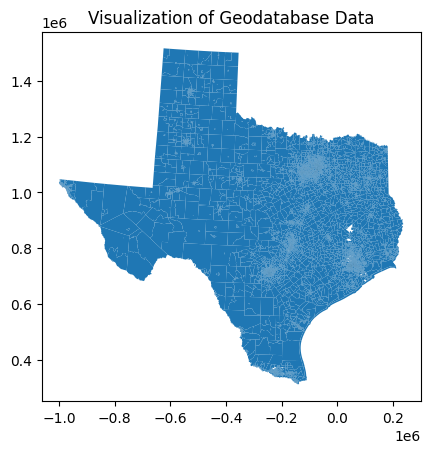

In [35]:
import matplotlib.pyplot as plt

# Basic plot
gdf.plot()

# Add title and show plot
plt.title('Visualization of Geodatabase Data')
plt.show()

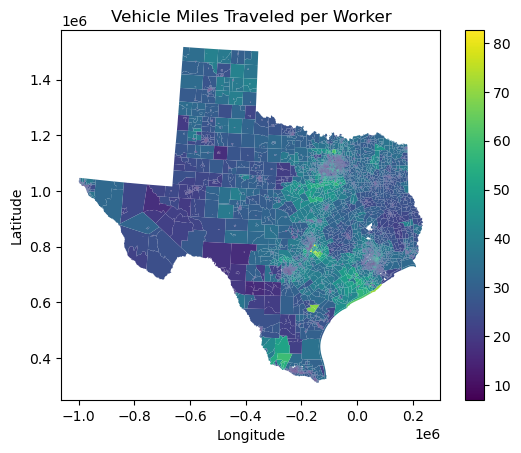

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt


# Visualize the data with color coding based on 'VMT_per_worker'
# We'll use a colormap to represent different values
fig, ax = plt.subplots(1, 1)
gdf.plot(column='VMT_per_worker', ax=ax, legend=True, cmap='viridis')

# Enhancing the plot
ax.set_title('Vehicle Miles Traveled per Worker')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


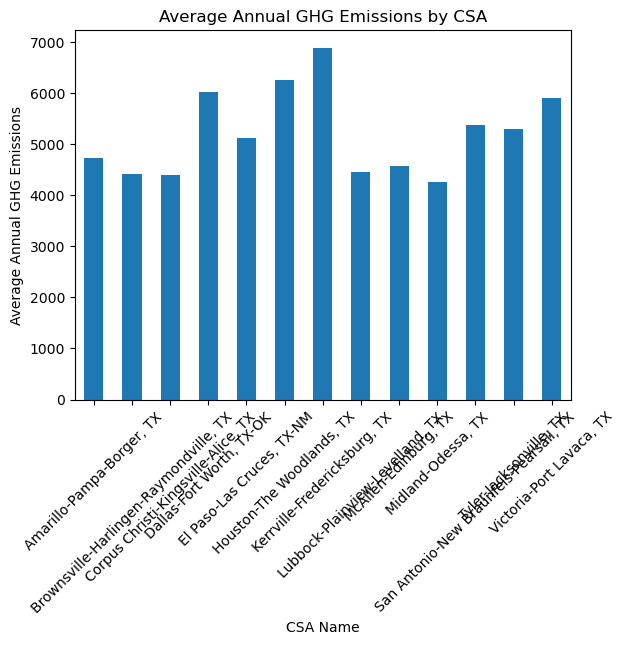

In [17]:
# Bar chart of average 'Annual_GHG' for each 'CSA_Name'
avg_ghg_per_csa = gdf.groupby('CSA_Name')['Annual_GHG'].mean()
avg_ghg_per_csa.plot(kind='bar')
plt.title('Average Annual GHG Emissions by CSA')
plt.xlabel('CSA Name')
plt.ylabel('Average Annual GHG Emissions')
plt.xticks(rotation=45)  # Rotates the labels to make them readable
plt.show()


# Exploratory Spatial Analysis

In [38]:
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
from pysal.lib import weights
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline

In [40]:
w = weights.Queen.from_dataframe(gdf)

moran = esda.Moran(gdf['Annual_GHG'], w)

C:\Users\EndUser\AppData\Local\Temp\ipykernel_936\525523598.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(gdf)


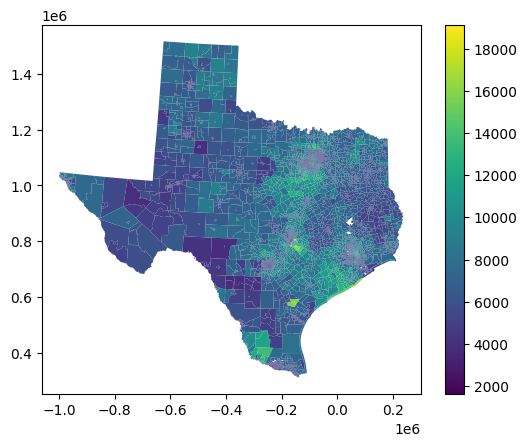

In [41]:
gdf.plot(column='Annual_GHG', legend=True)
plt.show()

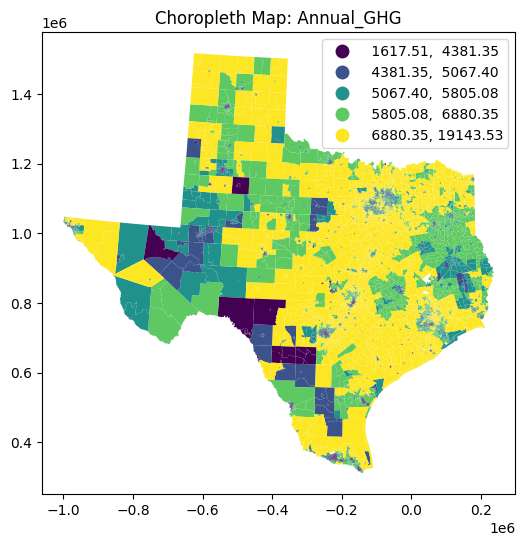

In [42]:
# Choose a column for visualization
column_to_visualize = 'Annual_GHG'

# Create a choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf.plot(column=column_to_visualize, ax=ax, legend=True, scheme='quantiles', cmap='viridis')
ax.set_title('Choropleth Map: ' + column_to_visualize)
plt.show()

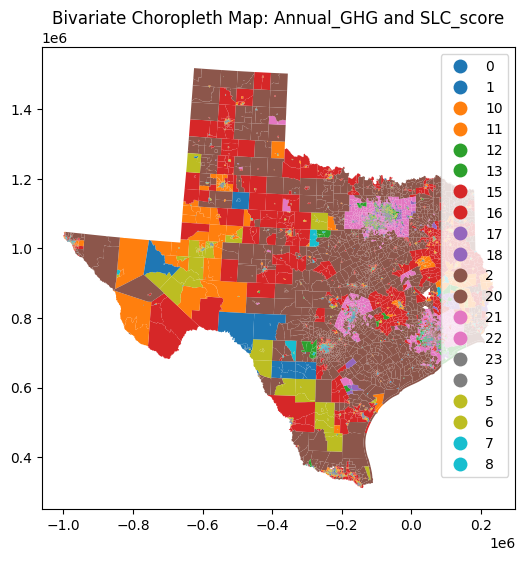

In [48]:
from mapclassify import Quantiles

# Select two columns for bivariate mapping
column1 = 'Annual_GHG'
column2 = 'SLC_score'

# Classify each column
scheme1 = Quantiles(gdf[column1], k=5)
scheme2 = Quantiles(gdf[column2], k=5)

# Create bivariate colors
gdf['bivariate'] = scheme1.yb * 5 + scheme2.yb
gdf['bivariate'] = gdf['bivariate'].astype(str)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf.plot(column='bivariate', ax=ax, legend=True, categorical=True)
ax.set_title('Bivariate Choropleth Map: ' + column1 + ' and ' + column2)
plt.show()